In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
from ydata_profiling import ProfileReport as ydata_prof

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ValueError)

In [38]:
df = pd.read_csv("C:/Users/norri/Desktop/native_cassandra.csv", parse_dates=['DATE'])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE                    104 non-null    datetime64[ns]
 1   display_s               104 non-null    float64       
 2   brands_branded_s        104 non-null    float64       
 3   brands_competitive_s    104 non-null    float64       
 4   products_branded_s      104 non-null    float64       
 5   products_category_s     100 non-null    float64       
 6   products_competitive_s  104 non-null    float64       
 7   products_auto_s         104 non-null    float64       
 8   revenue                 104 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 7.4 KB


In [5]:
# df.drop(['brand_auto_s', 'brand_auto_i'], axis=1, inplace=True)

For the remaining NAs, upon inspection their are no more than five per variable and they 
are all in the same location, preceded by zeroes. Filling by zeroes is not unreasonable

In [40]:
df.fillna(0, inplace=True)

In [41]:
print((df == 0).sum() / len(df))

DATE                      0.000000
display_s                 0.000000
brands_branded_s          0.000000
brands_competitive_s      0.000000
products_branded_s        0.000000
products_category_s       0.278846
products_competitive_s    0.000000
products_auto_s           0.076923
revenue                   0.000000
dtype: float64


Display and brand_competitive are both above 50% zeroes. Let's take note and see
what the rest of the EDA shows us

In [43]:
# df_no_date = df[['brand_spend', 'video_spend', 'product_spend', 'revenue']]
# df_comp_comb = df[['brand_branded_s', 'product_branded_s', 'product_category_s', 'competitive_all_s', 'revenue']]
# df_p_comp = df[['brand_branded_s', 'product_branded_s', 'product_category_s', 'product_competitive_s', 'revenue']]
# # df_no_dep = df.drop(['shipped_units', 'revenue', 'DATE'], axis=1)
df_no_date = df[['display_s', 'brands_branded_s', 'brands_competitive_s', 'products_branded_s', 'products_category_s', 'products_competitive_s', 'products_auto_s', 'revenue']]


In [44]:
df.nunique()

DATE                      104
display_s                 104
brands_branded_s          104
brands_competitive_s      104
products_branded_s        104
products_category_s        76
products_competitive_s    104
products_auto_s            97
revenue                   104
dtype: int64

Looking for sufficient variance here. With units, they tend to have less variance.
We can verify variance with the KDE plots overlaying the histograms.

In [45]:
df.describe()

,DATE,display_s,brands_branded_s,brands_competitive_s,products_branded_s,products_category_s,products_competitive_s,products_auto_s,revenue
count,104,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,2022-06-01 12:00:00,2664.059615,4066.499808,11883.259615,12754.175288,957.782885,93101.194135,4029.634615,444295.245865
min,2021-06-06 00:00:00,193.950000,451.900000,404.880000,3640.840000,0.000000,61646.480000,0.000000,258003.760000
25%,2021-12-03 06:00:00,1673.040000,1647.052500,3296.817500,9476.192500,0.000000,82540.062500,2442.582500,335611.247500
50%,2022-06-01 12:00:00,2642.010000,3061.495000,12581.050000,12132.435000,156.090000,91466.085000,3697.320000,441203.145000
75%,2022-11-28 18:00:00,3308.695000,6122.835000,17241.522500,16008.350000,958.147500,104633.825000,5290.822500,507633.745000
max,2023-05-28 00:00:00,9014.040000,12695.680000,36579.350000,25496.180000,9147.890000,124694.450000,14089.120000,704655.030000
std,NaN,1272.977277,2861.151341,8611.097864,5254.523664,1810.579180,15754.697865,2863.955915,110409.525933


<Axes: xlabel='revenue', ylabel='Count'>

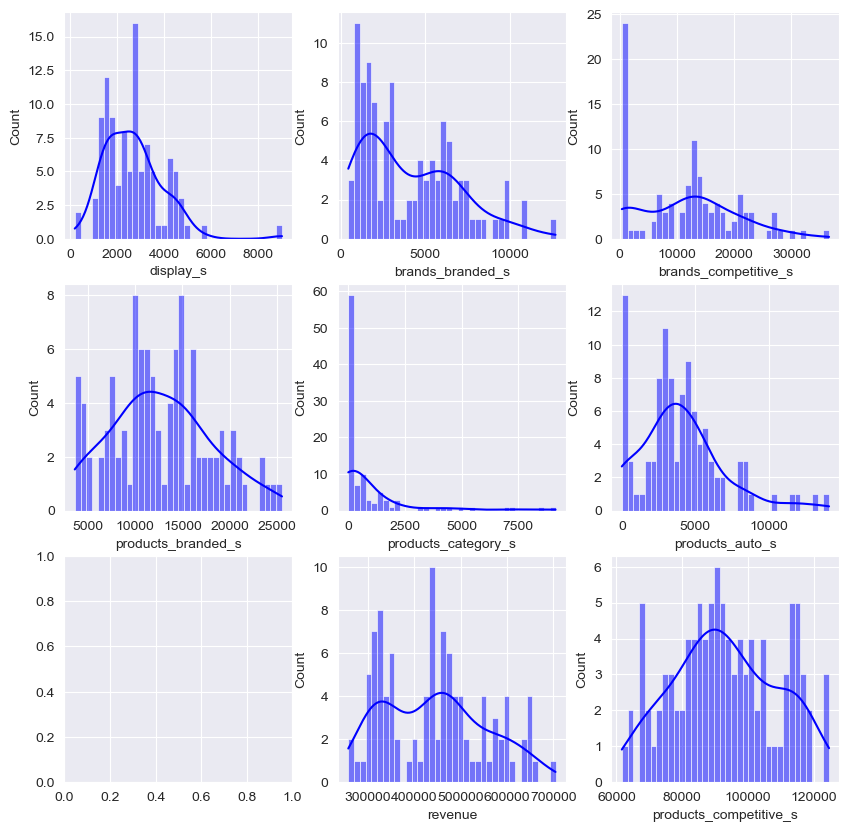

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
sns.histplot(df_no_date['display_s'], stat='count', kde=True, bins=int(180/5), ax=axes[0, 0], color = 'blue')
sns.histplot(df_no_date['brands_branded_s'], kde=True, bins=int(180/5), ax=axes[0, 1], color = 'blue')
sns.histplot(df_no_date['brands_competitive_s'], kde=True, bins=int(180/5), ax=axes[0, 2], color = 'blue')
sns.histplot(df_no_date['products_competitive_s'], kde=True, bins=int(180/5), ax=axes[2, 2], color = 'blue')
sns.histplot(df_no_date['products_branded_s'], stat='count', kde=True, bins=int(180/5), ax=axes[1, 0], color = 'blue')
sns.histplot(df_no_date['products_category_s'], kde=True, bins=int(180/5), ax=axes[1, 1], color = 'blue')
sns.histplot(df_no_date['products_auto_s'], kde=True, bins=int(180/5), ax=axes[1, 2], color = 'blue')
# sns.histplot(df_no_date['product_auto'], stat='count', kde=True, bins=int(180/5), ax=axes[2, 0], color = 'blue')
sns.histplot(df_no_date['revenue'], kde=True, bins=int(180/5), ax=axes[2, 1], color = 'blue')

The variables with the significant percentage of zeroes are troublesome, but the remainder
look decent.

<Axes: >

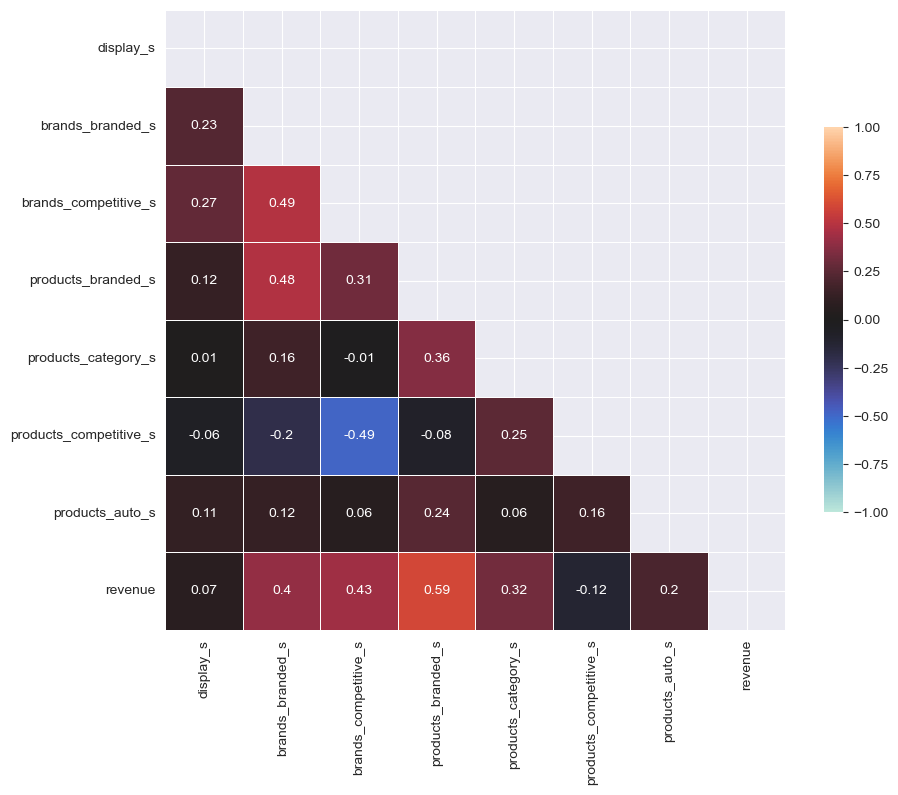

In [47]:
corr = df_no_date.corr(method="pearson").round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.color_palette('icefire', as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

With weak to no correlations with revenue and the same with shipped_units, 
the data may have difficulty in the MMM

In [13]:
# corr = df_comp_comb.corr(method="pearson").round(2)
# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(10, 10))
# cmap = sns.color_palette('icefire', as_cmap=True)
# sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

This section checks for outliers and approximates some idea of how extreme they are.
However, in Robyn, its converge() function that runs within the robyn_run() model
automatically winsorizes (adjusts upper and lower bounds of data input). This is just
a diagnostic if the model output is abnormal.

In [14]:
# corr = df_p_comp.corr(method="pearson").round(2)
# mask = np.triu(np.ones_like(corr, dtype=bool))
# f, ax = plt.subplots(figsize=(10, 10))
# cmap = sns.color_palette('icefire', as_cmap=True)
# sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [48]:
lower_q = df_no_date.quantile(0.25)
upper_q = df_no_date.quantile(0.75)
iqr = upper_q - lower_q
lower_bound = lower_q - (1.5 * iqr)
upper_bound = upper_q + (1.5 * iqr)
outliers = df_no_date[(df_no_date < lower_bound) | (df_no_date > upper_bound)]
print(outliers.count()/len(df))

display_s                 0.009615
brands_branded_s          0.000000
brands_competitive_s      0.000000
products_branded_s        0.000000
products_category_s       0.105769
products_competitive_s    0.000000
products_auto_s           0.048077
revenue                   0.000000
dtype: float64


With the large number of zeroes, any non-zero values could quickly become outliers.

These two modules make html reports that are quite good and can supplement for an EDA if the EDA is not available.
In addition, I chose them because they do a good Time Series analysis and export it.

In [37]:
profile_y_basic = ydata_prof(df, title="Initial EDA")
profile_y_basic.to_file("basic_eda.html")
profile_y_ts = ydata_prof(df, tsmode=True, sortby="DATE", title='Time Series EDA')
profile_y_ts.to_file("time_series_eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: NaTType does not support strftime

This also meets the basic criteria to be useful for Cassandra

In [ ]:
# df.to_csv('jbss_cassandra.csv', index=False)